In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
#create a df of the dataset
credit_card_df= pd.read_csv('creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
credit_card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
credit_card_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [7]:
Class_count= credit_card_df['Class'].value_counts()
print(Class_count)

0    284315
1       492
Name: Class, dtype: int64


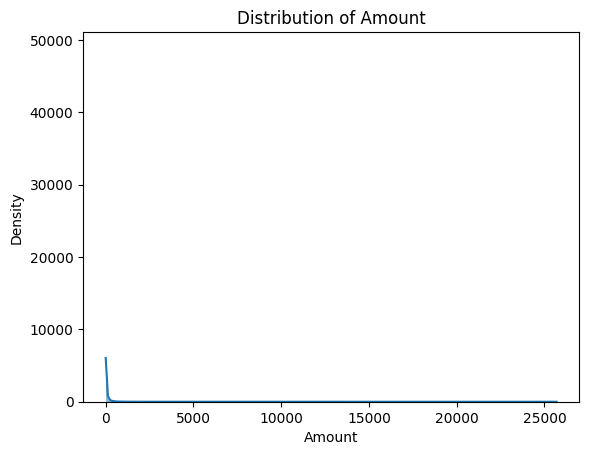

In [8]:
import seaborn as sns

# Plotting the histogram with a density plot
sns.histplot(credit_card_df['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

/var/folders/4s/splx1tys0gvghyr_7hx7vcmr0000gq/T/ipykernel_81570/80507337.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax, color='r')


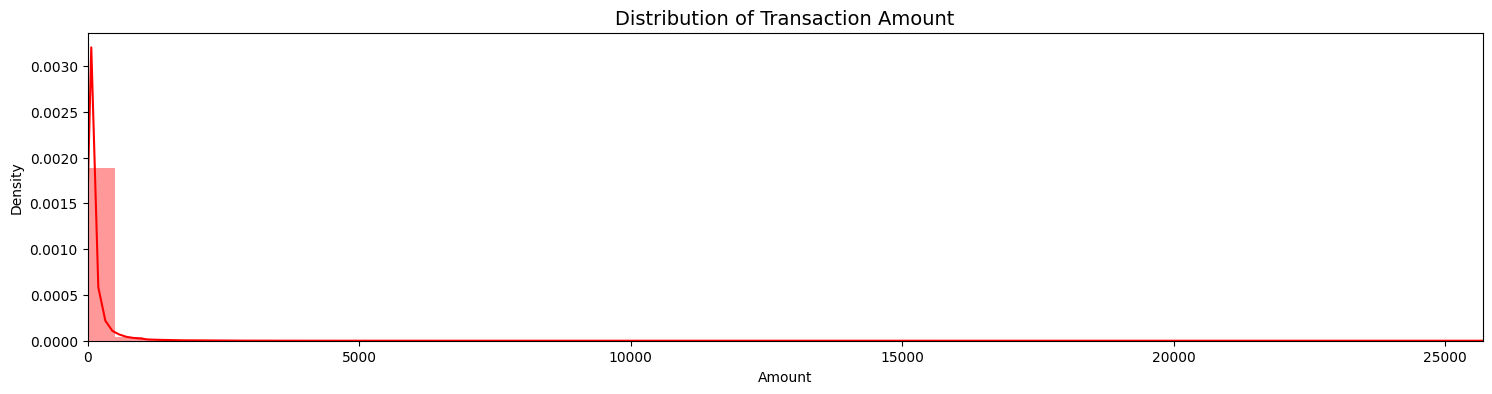

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with specified size
fig, ax = plt.subplots(figsize=(18, 4))

# Retrieve the 'Amount' values from the dataframe
amount_val = credit_card_df['Amount'].values

# Plot the distribution of transaction amount
sns.distplot(amount_val, ax=ax, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(amount_val), max(amount_val)])
plt.xlabel('Amount')
plt.ylabel('Density')
# Display the plot
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

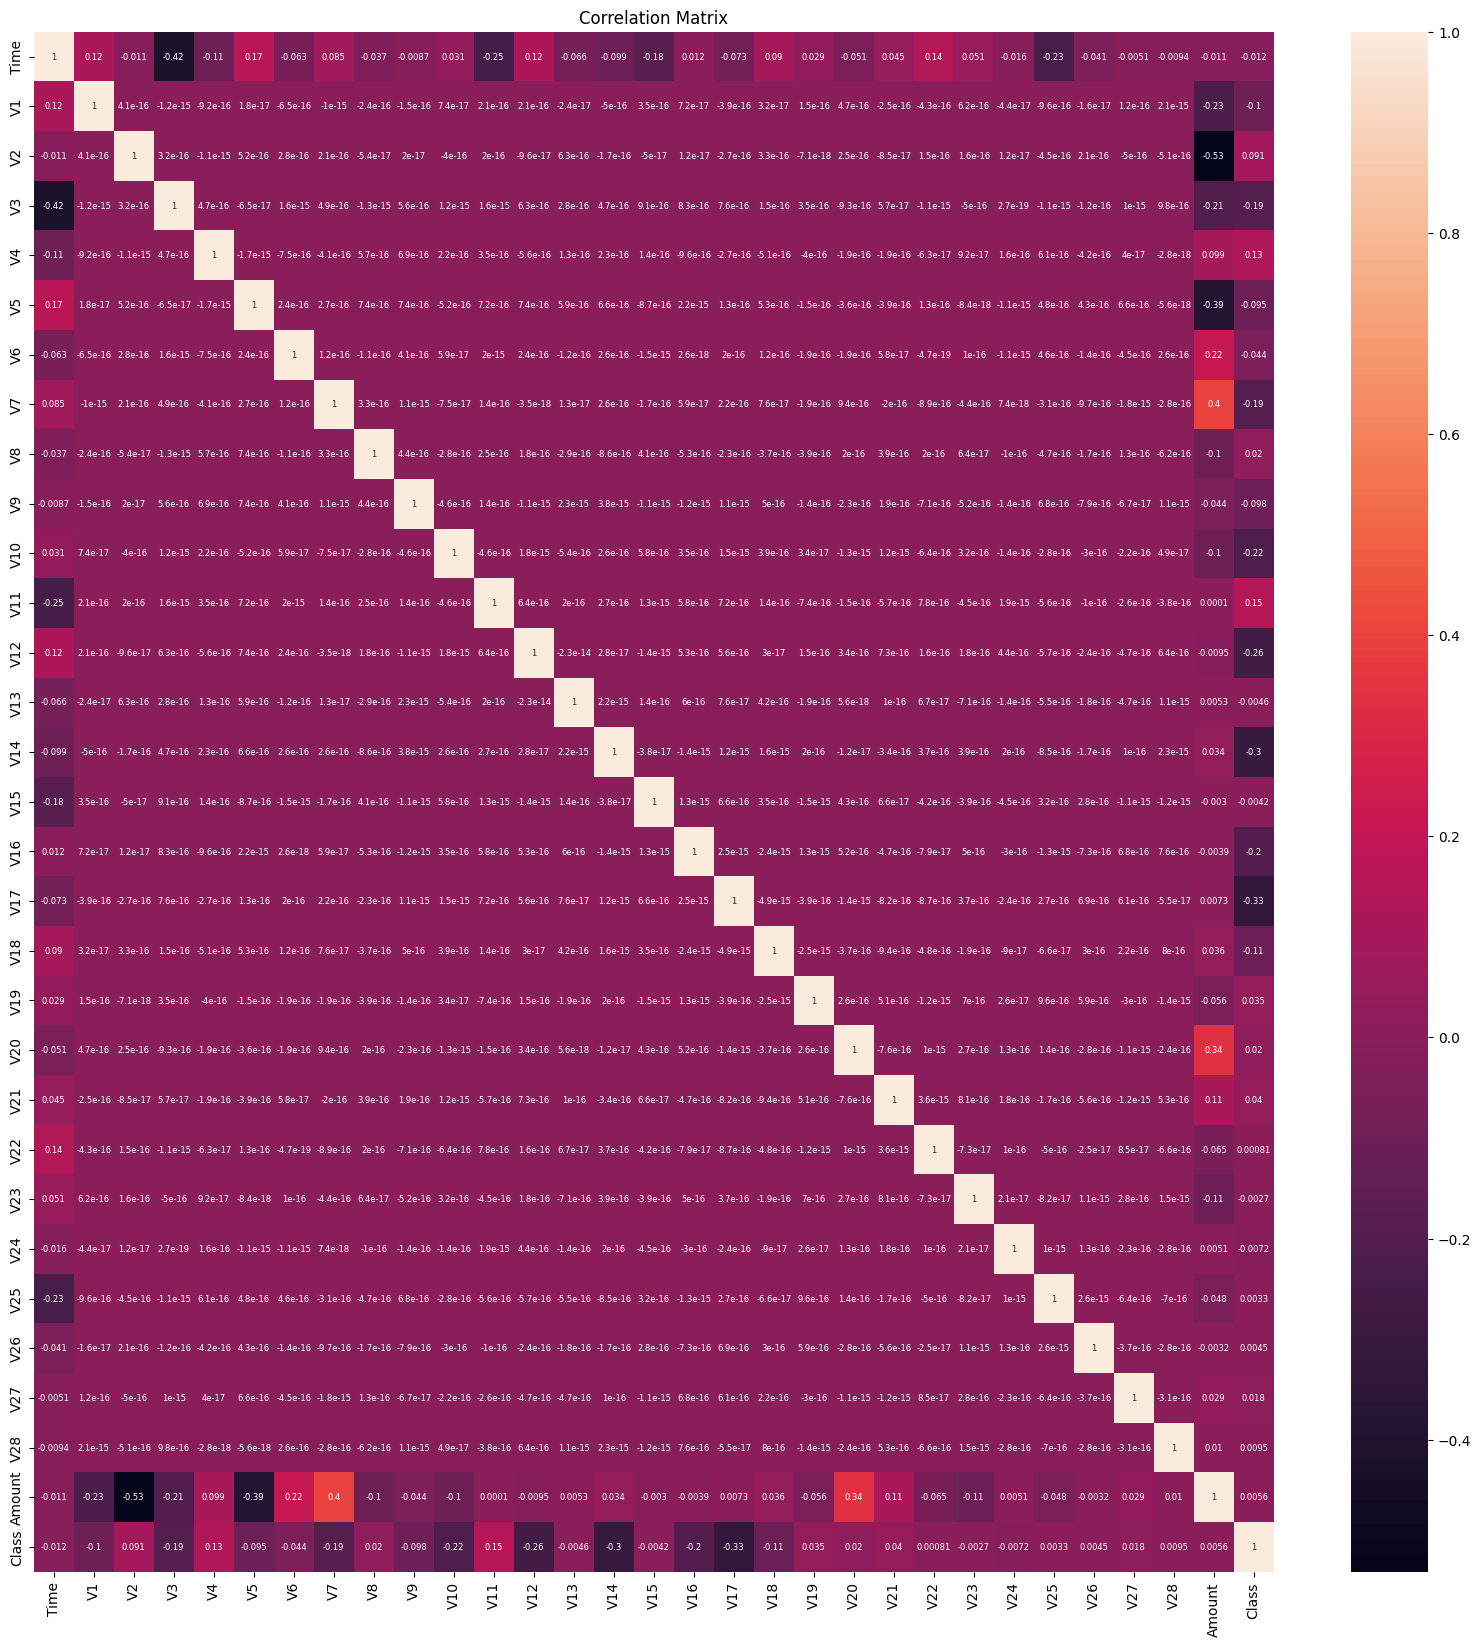

In [17]:
corr= credit_card_df.corr()
#plot correlation 
plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot= True, annot_kws={'size':6})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show


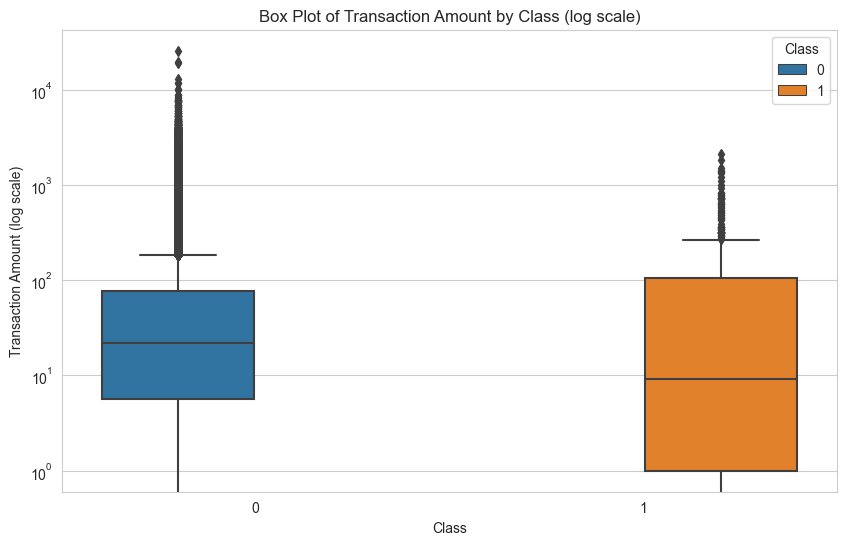

In [27]:
#plot the distribution of amount with class as hue
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=credit_card_df, x="Class", y="Amount", hue="Class")

plt.xlabel("Class")
plt.ylabel("Transaction Amount (log scale)")
plt.title("Box Plot of Transaction Amount by Class (log scale)")

# Set y-axis to logarithmic scale
ax.set_yscale('log')

plt.show()

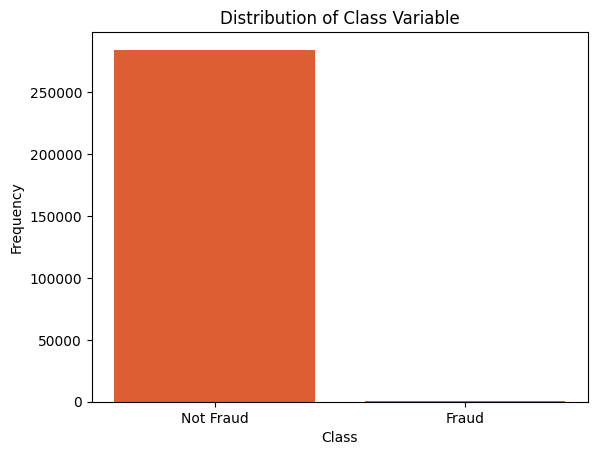

In [7]:
# Create a bar chart to visualize the distribution
bar_color = '#dd5e32'
plt.bar(Class_count.index, Class_count.values, color= bar_color)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class Variable')

# Add class labels if needed
plt.xticks(Class_count.index, ['Not Fraud', 'Fraud'])

# Display the chart
plt.show()

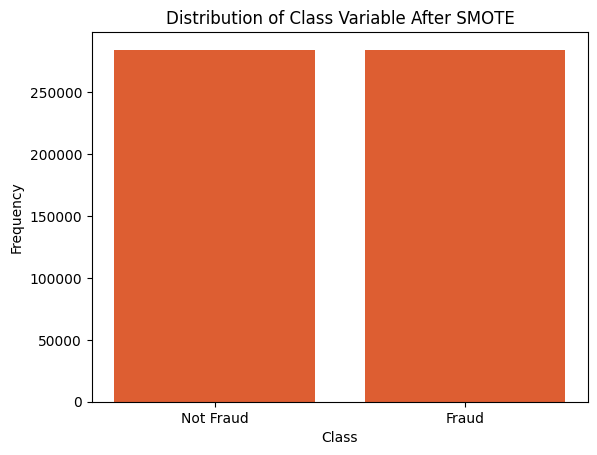

In [8]:
from imblearn.over_sampling import SMOTE

X= credit_card_df.drop('Class', axis=1)
y= credit_card_df['Class']
# Instantiate the SMOTE resampling technique
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# After resampling, check the class distribution
y_resampled.value_counts()

# visualize the distribution of the resampled target variable
import matplotlib.pyplot as plt

class_counts_resampled = pd.Series(y_resampled).value_counts()

# Define the bar color
bar_color = '#dd5e32'

# Create a bar chart to visualize the distribution with dark navy blue bars
plt.bar(class_counts_resampled.index, class_counts_resampled.values, color=bar_color)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class Variable After SMOTE')

# Add class labels if needed
plt.xticks(class_counts_resampled.index, ['Not Fraud', 'Fraud'])

# Display the chart
plt.show()

In [9]:
# save SMOTE resampled data into csv
# Create a DataFrame for the resampled data
class_counts_resampled = pd.DataFrame(X_resampled, columns=X.columns)
class_counts_resampled['Class'] = y_resampled  # Add the resampled target variable

# Save the resampled data to a CSV file
class_counts_resampled.to_csv('SMOTE resampled_data.csv', index=False)

0    492
1    492
Name: Class, dtype: int64


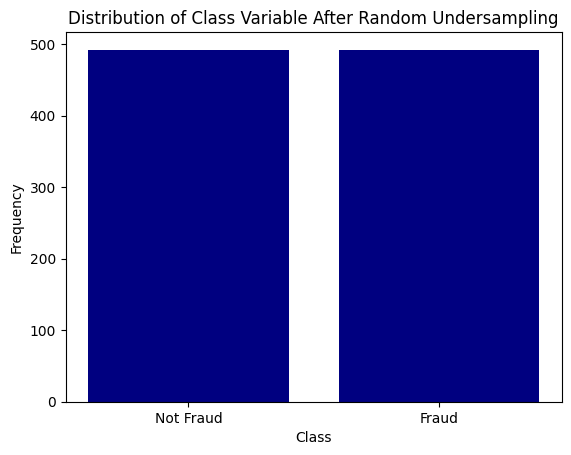

In [10]:
# trying undersampling
from imblearn.under_sampling import RandomUnderSampler

X= credit_card_df.drop('Class', axis=1)
y= credit_card_df['Class']

# Instantiate the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Resample the data
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# After undersampling,  check the class distribution
y_undersampled.value_counts()
print(y_undersampled.value_counts())
# visualize the distribution of the undersampled target variable
class_counts_undersampled = pd.Series(y_undersampled).value_counts()

# Define the bar color
bar_color = 'navy'

# Create a bar chart to visualize the distribution with dark navy blue bars
plt.bar(class_counts_undersampled.index, class_counts_undersampled.values, color=bar_color)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class Variable After Random Undersampling')

# Add class labels if needed
plt.xticks(class_counts_undersampled.index, ['Not Fraud', 'Fraud'])

# Display the chart
plt.show()


In [11]:
# save undersampled data into csv
# Create a DataFrame for the resampled data
class_counts_undersampled = pd.DataFrame(X_undersampled, columns=X.columns)
class_counts_undersampled['Class'] = y_undersampled  # Add the resampled target variable

# Save the resampled data to a CSV file
class_counts_undersampled.to_csv('Undersampled_data.csv', index=False)